参考：
https://nykergoto.hatenablog.jp/entry/2017/05/29/python%E3%81%A7%E3%82%AC%E3%82%A6%E3%82%B9%E9%81%8E%E7%A8%8B%E5%9B%9E%E5%B8%B0_~_%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%BC%E3%83%AB%E3%81%AE%E6%AF%94%E8%BC%83_~#:~:text=Python%20%E3%81%A7%20%E3%82%AC%E3%82%A6%E3%82%B9%20%E9%81%8E%E7%A8%8B%E3%82%92%E8%A1%8C%E3%81%86%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%BC%E3%83%AB%E3%81%AB%E3%81%AF%E5%A4%A7%E3%81%8D%E3%81%8F%E5%88%86%E3%81%91%E3%81%A62%E3%81%A4%E3%81%8C%E5%AD%98%E5%9C%A8%E3%81%97%E3%81%BE%E3%81%99%E3%80%82%20%E4%B8%80%E3%81%A4%E3%81%AF%20Gpy%20%28Gaussian%20Process,GitHub%20-%20SheffieldML%2FGPy%3A%20Gaussian%20processes%20framework%20in%20python

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels as sk_kern

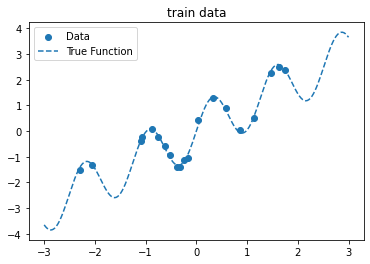

In [12]:
def true_func(x):
    """
    正しい関数
    
    :param np.array x:
    :return: 関数値 y
    :rtype: np.array
    """
    y = x + np.sin(5 * x)
    return y

np.random.seed(1)
x_train = np.random.normal(0, 1., 20)
y_train = true_func(x_train) + np.random.normal(loc=0, scale=.1, size=x_train.shape)
xx = np.linspace(-3, 3, 200)
plt.scatter(x_train, y_train, label="Data")
plt.plot(xx, true_func(xx), "--", color="C0", label="True Function")
plt.legend()
plt.title("train data")
plt.savefig("../fig/training_data.png", dpi=150)

In [13]:
kernel = sk_kern.RBF(1.0, (1e-3, 1e3)) + sk_kern.ConstantKernel(1.0, (1e-3, 1e3)) + sk_kern.WhiteKernel()
clf = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10, 
    optimizer="fmin_l_bfgs_b", 
    n_restarts_optimizer=20,
    normalize_y=True)

In [14]:
# テストデータ（有限の予測点）を設定する
x_test = xx.reshape(-1, 1)

In [15]:
# X は (n_samples, n_features) の shape に変形する必要がある
clf.fit(x_train.reshape(-1, 1), y_train)

# パラメータ学習後のカーネルは self.kernel_ に保存される
clf.kernel_ # < RBF(length_scale=0.374) + 0.0316**2 + WhiteKernel(noise_level=0.00785)

# 予測は平均値と、オプションで 分散、共分散 を得ることが出来る
pred_mean, pred_std= clf.predict(x_test, return_std=True)

c:\Users\ara-d\anaconda3\envs\aigle-pipeline\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


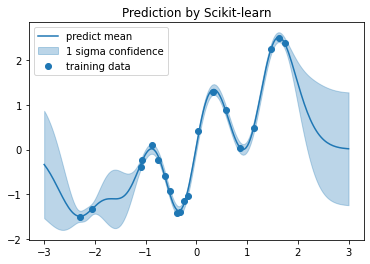

In [17]:
def plot_result(x_test, mean, std):
    plt.plot(x_test[:, 0], mean, color="C0", label="predict mean")
    plt.fill_between(x_test[:, 0], mean + std, mean - std, color="C0", alpha=.3,label= "1 sigma confidence")
    plt.plot(x_train, y_train, "o",label= "training data")

x_test = np.linspace(-3., 3., 200).reshape(-1, 1)
plot_result(x_test, pred_mean, pred_std)
plt.title("Prediction by Scikit-learn")
plt.legend()
plt.savefig("../fig/sklern_predict.png", dpi=150)